# An√°lisis de Churn de Clientes en TelecomX

## Introducci√≥n

Este notebook presenta un an√°lisis exploratorio y de limpieza de datos para comprender los factores que influyen en el abandono de clientes (Churn) en la empresa de telecomunicaciones TelecomX. El objetivo principal es identificar patrones y caracter√≠sticas de los clientes que deciden dejar la empresa, con el fin de desarrollar estrategias de retenci√≥n m√°s efectivas.

A trav√©s de este an√°lisis, se abordar√°n las siguientes etapas:

1.  **Extracci√≥n de Datos:** Carga del dataset de clientes.
2.  **Transformaci√≥n de Datos:** Limpieza, manejo de valores ausentes/duplicados/inconsistencias, y creaci√≥n de nuevas variables.
3.  **An√°lisis Descriptivo y Visualizaci√≥n:** Exploraci√≥n de la distribuci√≥n de las variables y relaciones entre ellas, con un enfoque en la variable Churn.
4.  **Identificaci√≥n de Segmentos Clave:** An√°lisis de grupos de clientes con alta propensi√≥n al Churn.
5.  **Preparaci√≥n para Modelado:** Conclusiones sobre la necesidad de t√©cnicas m√°s avanzadas (Machine Learning) para predecir el Churn.

Este trabajo sienta las bases para futuros an√°lisis predictivos y la implementaci√≥n de modelos que permitan anticipar el comportamiento de los clientes y reducir la tasa de abandono.

# METADATOS

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente


#üìå Extracci√≥n

In [ ]:
url=('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(url)

In [ ]:
df.head(3)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [ ]:
columnas=list(df.columns)
print(columnas)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
print("--- DataFrame original (primeras filas y tipos de datos) ---")
print("\nTipos de datos originales:")
print(df.dtypes)
print("\nColumnas del DataFrame original:")
print(df.columns)

--- DataFrame original (primeras filas y tipos de datos) ---

Tipos de datos originales:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Columnas del DataFrame original:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [ ]:
# --- 1. Desanidado de la columna 'customer' ---
print("\nPrimera entrada de 'customer':", df['customer'].iloc[0])
df_customer = pd.json_normalize(df['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns] # Renombrar para evitar conflictos
df_customer.head(1)


Primera entrada de 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


customer_gender  customer_SeniorCitizen customer_Partner  \
0          Female                       0              Yes   

  customer_Dependents  customer_tenure  
0                 Yes                9

In [ ]:
# --- 2. Desaninado de la columna 'phone' ---
print("\nPrimera entrada de 'phone':", df['phone'].iloc[0])
df_phone = pd.json_normalize(df['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns] # Renombrar para evitar conflictos
df_phone.head(2)



Primera entrada de 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}


phone_PhoneService phone_MultipleLines
0                Yes                  No
1                Yes                 Yes

In [ ]:
# --- 3. Desanidado de la columna 'internet' ---
print("\nPrimera entrada de 'internet':", df['internet'].iloc[0])
df_internet = pd.json_normalize(df['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns] # Renombrar para evitar conflictos
df_internet.head(2)


Primera entrada de 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}


internet_InternetService internet_OnlineSecurity internet_OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet_StreamingMovies  
0                       No  
1                      Yes

In [ ]:
# --- 4. Desanidado de la columna 'account' ---
df_account = pd.json_normalize(df['account'])
df_account.columns = ['account_' + col for col in df_account.columns] # Renombrar para evitar conflictos
df_account.head(2)

account_Contract account_PaperlessBilling account_PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   

   account_Charges.Monthly account_Charges.Total  
0                     65.6                 593.3  
1                     59.9                 542.4

In [ ]:
# REUNIR TODA LA INFORMACI√ìN EN UN SOLO DATAFRAME
# 1. Seleccionar las columnas originales no anidadas
df_base = df[['customerID', 'Churn']].copy()
df_base.head(2)

customerID Churn
0  0002-ORFBO    No
1  0003-MKNFE    No

In [ ]:
#2. Concatenar horizontalmente (axis=1) todos los DataFrames
df_final = pd.concat([
    df_base.reset_index(drop=True),# Aseguramos que los √≠ndices coincidan con reset_index(drop=True) para mayor robustez,
    df_customer.reset_index(drop=True),# aunque si todos tienen el mismo n√∫mero de filas y no han sido reordenados, no ser√≠a estrictamente necesario, pero es buena pr√°ctica.
    df_phone.reset_index(drop=True),
    df_internet.reset_index(drop=True),
    df_account.reset_index(drop=True)
], axis=1)

# --- Paso 3: Verificar el DataFrame final ---
print("\n--- Columnas del DataFrame final unificado ---")
print(df_final.columns.tolist())

print(f"\n--- Dimensiones del DataFrame final: {df_final.shape} ---")


--- Columnas del DataFrame final unificado ---
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']

--- Dimensiones del DataFrame final: (7267, 21) ---


In [ ]:
df_final.head(3)

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly  account_Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  

[3 rows x 21 columns]

In [ ]:
# RENOMBRANDO LAS COLUMNAS 'account_Charges.Monthly' y 'account_Charges.Total'

columnas_a_renombrar = {
    'account_Charges.Monthly': 'account_Charges_Monthly',  # Reemplazar punto por guion bajo
    'account_Charges.Total': 'account_Charges_Total'
}

df_final = df_final.rename(columns=columnas_a_renombrar)
print(df_final.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


#üîß Transformaci√≥n

#**LIMPIEZA DE DATOS:**
En este paso, verifica si hay problemas en los datos que puedan afectar el an√°lisis. Presta atenci√≥n a valores ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Este proceso es esencial para asegurarte de que los datos est√©n listos para las siguientes etapas.

#**VALORES NULOS**

In [ ]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

Aparentemente no hay valores nulos, vamos a verificar con:

- .isnull().sum()


In [ ]:
print("Conteo de valores nulos por columna")
print(df_final.isnull().sum())

Conteo de valores nulos por columna
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


Luego de este an√°lisis, se concluye que no hay valores nulos


#**FILAS DUPLICADAS**

In [ ]:
antes = len(df_final)
df= df_final.drop_duplicates()
despues = len(df_final)
eliminado = antes - despues
print("Filas Antes:",antes)
print("Filas despues:", despues)
print("Filas eliminadas", eliminado)

Filas Antes: 7267
Filas despues: 7267
Filas eliminadas 0


In [ ]:
print(df_final['customerID'].duplicated().sum())

0


Se concluye que no hay filas de clientes duplicados.

#**VALORES VACIOS O EN BLANCO**

In [ ]:
# Detecci√≥n de valores vac√≠os o en blanco
df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer_gender                0
customer_SeniorCitizen         0
customer_Partner               0
customer_Dependents            0
customer_tenure                0
phone_PhoneService             0
phone_MultipleLines            0
internet_InternetService       0
internet_OnlineSecurity        0
internet_OnlineBackup          0
internet_DeviceProtection      0
internet_TechSupport           0
internet_StreamingTV           0
internet_StreamingMovies       0
account_Contract               0
account_PaperlessBilling       0
account_PaymentMethod          0
account_Charges_Monthly        0
account_Charges_Total         11
dtype: int64

In [ ]:
# Se detectaron valores Churn en blanco '', no se sabe si permanencen en la empresa
# o van a dar de baja el servicio. Dado que son aproximademente un 3% de los datos, se proceder√°
# a extraerlos a otro # DataFrame llamado churn_blancos y  se quedar√°n almacenados en esta variable
# en caso que luego de los an√°lisis adquirieran alguna relevancia

In [ ]:
# Contar cu√°ntos espacios en blanco hay (para verificar)
num_espacios_blanco = (df_final['Churn'] == '').sum()
print(f"N√∫mero de registros con espacios en blanco en 'Churn': {num_espacios_blanco}")

# Listar los registros donde 'Churn' es un espacio en blanco
churn_blancos = df_final[df_final['Churn'] == '']
print("\nPrimeros 5 registros con espacios en blanco en 'Churn':")
display(churn_blancos.iloc[:, :4].head())
print(f"\nDimensiones de los registros con espacios en blanco: {churn_blancos.shape}")

N√∫mero de registros con espacios en blanco en 'Churn': 224

Primeros 5 registros con espacios en blanco en 'Churn':


customerID Churn customer_gender  customer_SeniorCitizen
30   0047-ZHDTW                Female                       0
75   0120-YZLQA                  Male                       0
96   0154-QYHJU                  Male                       0
98   0162-RZGMZ                Female                       1
175  0274-VVQOQ                  Male                       1


Dimensiones de los registros con espacios en blanco: (224, 21)


In [ ]:
# Respecto de los 11 registros en blanco de la columna account_Charges_Total (ACT)
# se quedar√°n almacenados en la variable ACT_blancos en caso que luego de los an√°lisis
# adquirieran alguna relevancia.

espacios_blanco_ACT = (df_final['account_Charges_Total'].astype(str).str.strip() == '').sum()
print(f"N√∫mero de registros con espacios en blanco en 'account_Charges_Total': {espacios_blanco_ACT}")

# Almacenar los registros en el Df ACT_blancos
ACT_blancos = df_final[df_final['account_Charges_Total'].astype(str).str.strip() == '']
print("\nPrimeros 5 registros con espacios en blanco en 'account_Charges_Total':")
display(ACT_blancos.iloc[:, :4].head())
print(f"\nDimensiones de los registros con espacios en blanco: {ACT_blancos.shape}")


N√∫mero de registros con espacios en blanco en 'account_Charges_Total': 11

Primeros 5 registros con espacios en blanco en 'account_Charges_Total':


customerID Churn customer_gender  customer_SeniorCitizen
975   1371-DWPAZ    No          Female                       0
1775  2520-SGTTA    No          Female                       0
1955  2775-SEFEE    No            Male                       0
2075  2923-ARZLG    No            Male                       0
2232  3115-CZMZD    No            Male                       0


Dimensiones de los registros con espacios en blanco: (11, 21)


Quedan dos dataframes de datos, que podr√≠an ser de utilidad en los an√°lisis ulteriores:
  - churn_blancos
  - ACT_blancos (account_Charges_Total)

In [ ]:
# # Exportar df_churn_blancos a CSV
# churn_blancos.to_csv('churn_blancos.csv', index=False)

# # Exportar df_ACT_blancos a CSV
# ACT_blancos.to_csv('ACT_blancos.csv', index=False)

# print("Los DataFrames churn_blancos y ACT_blancos han sido exportados como 'churn_blancos.csv' y 'ACT_blancos.csv'")

Los DataFrames churn_blancos y ACT_blancos han sido exportados como 'churn_blancos.csv' y 'ACT_blancos.csv'


In [ ]:
# # Borrado del Data Frame df_final de los churn y ACT en 'blanco':
# print(f"Dimensiones del DataFrame antes de eliminar: {df_final.shape}")
# df_final = df_final[
#     (df_final['Churn'].astype(str).str.strip() != '') &
#     (df_final['account_Charges_Total'].astype(str).str.strip() != '')
# ].copy()
# print(f"Dimensiones del DataFrame despu√©s de eliminar: {df_final.shape}")

Dimensiones del DataFrame antes de eliminar: (7267, 21)
Dimensiones del DataFrame despu√©s de eliminar: (7032, 21)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
df_final.sample(30)

customerID Churn customer_gender  customer_SeniorCitizen  \
5058  6907-NZZIJ   Yes          Female                       0   
3122  4353-HYOJD    No          Female                       0   
5676  7758-UJWYS    No            Male                       0   
3715  5127-BZENZ    No          Female                       0   
3654  5035-BVCXS    No            Male                       0   
2539  3544-FBCAS    No          Female                       0   
6374  8755-IWJHN    No            Male                       1   
6736  9281-OFDMF    No            Male                       1   
2014  2845-AFFTX   Yes            Male                       1   
680   0967-BMLBD    No          Female                       0   
3687  5081-NWSUP    No          Female                       0   
3574  4925-LMHOK   Yes            Male                       0   
2326  3244-CQPHU    No          Female                       1   
5805  7941-RCJOW    No            Male                       0   
5028  6874-SGLHU    No            Male                       0   
2228  3104-OWCGK   Yes            Male                       0   
284   0410-IPFTY    No          Female                       0   
166   0264-CNITK    No          Female                       0   
731   1047-NNCBF    No            Male                       0   
3969  5429-LWCMV    No          Female                       0   
5054  6906-ANDWJ   Yes            Male                       0   
2791  3870-MQAMG   Yes          Female                       0   
2564  3577-AMVUX    No            Male                       0   
5471  7502-BNYGS    No          Female                       0   
3779  5183-SNMJQ    No            Male                       0   
3195  4462-CYWMH    No            Male                       1   
5602  7649-SIJJF    No            Male                       0   
4001  5472-CVMDX    No          Female                       0   
4675  6402-SSEJG    No          Female                       0   
7109  9788-HNGUT    No            Male                       0   

     customer_Partner customer_Dependents  customer_tenure phone_PhoneService  \
5058               No                  No               36                Yes   
3122              Yes                 Yes               27                Yes   
5676              Yes                 Yes               34                 No   
3715              Yes                 Yes               56                Yes   
3654               No                  No               11                Yes   
2539              Yes                 Yes               72                Yes   
6374              Yes                  No               69                Yes   
6736               No                  No               39                Yes   
2014              Yes                  No               41                Yes   
680               Yes                 Yes               11                Yes   
3687               No                  No               10                Yes   
3574               No                  No               15                Yes   
2326               No                  No               72                Yes   
5805               No                  No               65                Yes   
5028               No                  No               30                Yes   
2228              Yes                 Yes               60                Yes   
284               Yes                  No               31                Yes   
166               Yes                 Yes               71                Yes   
731                No                  No               20                Yes   
3969               No                  No               12                Yes   
5054              Yes                 Yes               15                Yes   
2791              Yes                  No               54                Yes   
2564               No                  No                1                Yes   
5471           

#**PRESENCIA OUTLIERS**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
columnas=list(df_final.columns)
columnas

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [ ]:
# Revisi√≥n de los valores unicos, en variables categ√≥ricas.
columnas_revision=['Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod']
# Para ver los valores √∫nicos de cada columna seleccionada:
for col in df_final[columnas_revision]:
    print(f"Valores √∫nicos en '{col}': {df_final[col].unique()}")

Valores √∫nicos en 'Churn': ['No' 'Yes' '']
Valores √∫nicos en 'customer_gender': ['Female' 'Male']
Valores √∫nicos en 'customer_SeniorCitizen': [0 1]
Valores √∫nicos en 'customer_Partner': ['Yes' 'No']
Valores √∫nicos en 'customer_Dependents': ['Yes' 'No']
Valores √∫nicos en 'phone_PhoneService': ['Yes' 'No']
Valores √∫nicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
Valores √∫nicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
Valores √∫nicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores √∫nicos en 'internet_OnlineBackup': ['Yes' 'No' 'No internet service']
Valores √∫nicos en 'internet_DeviceProtection': ['No' 'Yes' 'No internet service']
Valores √∫nicos en 'internet_TechSupport': ['Yes' 'No' 'No internet service']
Valores √∫nicos en 'internet_StreamingTV': ['Yes' 'No' 'No internet service']
Valores √∫nicos en 'internet_StreamingMovies': ['No' 'Yes' 'No internet service']
Valores √∫nicos en 'account_Contract': ['One year' 'Month-t

In [ ]:
# Revisi√≥n de los outliers en las columnas con datos nuemricos o cuantitativos
# Seleccionaremos s√≥lo las columnas 'cuantitativas', en un nuevo dataset:
columnas_cuantitativas = list(set(columnas) - set(columnas_revision))
print(columnas_cuantitativas)
columnas_cuantitativas.remove('customerID') #
#columnas_cuantitativas = list(set(columnas_cuantitativas) - set(['customerID']))
print(columnas_cuantitativas)

['customer_tenure', 'account_Charges_Total', 'customerID', 'account_Charges_Monthly']
['customer_tenure', 'account_Charges_Total', 'account_Charges_Monthly']


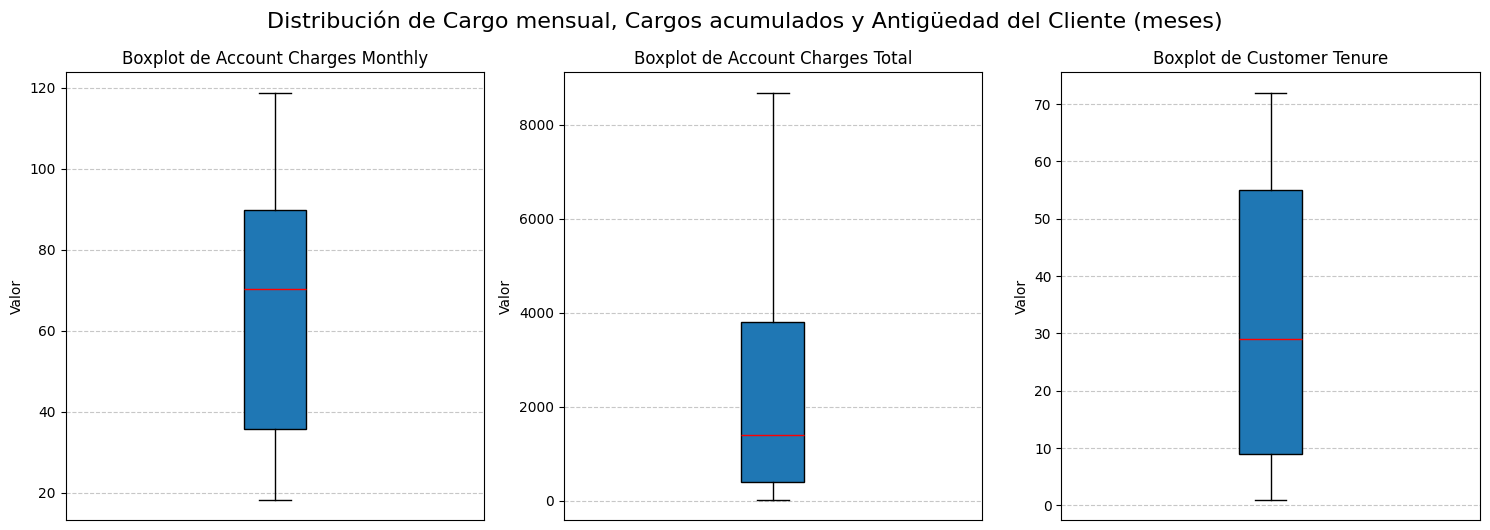

In [ ]:
# Se realiza un boxplot de cada columna num√©rica, para visualizar posibles outliers
import seaborn as sns
import matplotlib.pyplot as plt
#Convertir a num√©rico 'account_Charges_Total'
df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')

columnas_boxplot = [
    'account_Charges_Monthly',
    'account_Charges_Total',
    'customer_tenure'
]
# Construcci√≥n del gr√°fico:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False)
axes = axes.flatten() # Esto asegura que axes es un array 1D que podemos iterar
# Iterar sobre cada columna y crear un boxplot en su propio subplot
for i, col in enumerate(columnas_boxplot):
    data_to_plot_single = df_final[col].dropna()# Indica sobre que columna se construir√°n los gr√°ficos
    axes[i].boxplot(data_to_plot_single, patch_artist=True, medianprops={'color': 'red'})
    # A√±adir t√≠tulo espec√≠fico para cada subplot
    axes[i].set_title(f'Boxplot de {col.replace("_", " ").title()}', fontsize=12) # T√≠tulo m√°s legible
    axes[i].set_ylabel('Valor') # Etiqueta del eje Y
    axes[i].grid(axis='y', linestyle='--', alpha=0.7) # Cuadr√≠cula
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)# Opcional: Eliminar los ticks del eje X para que solo se vea la caja
plt.tight_layout()
fig.suptitle('Distribuci√≥n de Cargo mensual, Cargos acumulados y Antig√ºedad del Cliente (meses)', fontsize=16, y=1.05) # y=1.05 lo sube un poco
plt.show()

En los boxplots, no se aprecian valores outliers

In [ ]:
# Vamos a probar el m√©todo IQ3, para account_Charges_Total, que muestra el boxplot m√°s disperso.

Q1= df_final['account_Charges_Total'].quantile(0.25)
Q3= df_final['account_Charges_Total'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_final[(df_final["account_Charges_Total"] < limite_inferior) | (df_final["account_Charges_Total"] > limite_superior)] #  detecta los outliers
#valores_normales = df[(df['Valor'] >= limite_inferior) & (df['Valor'] <= limite_superior)] # Los elimina

#resultado
print("Datos Ordenados")
#print(valores_normales)
print(outliers)

Datos Ordenados
Empty DataFrame
Columns: [customerID, Churn, customer_gender, customer_SeniorCitizen, customer_Partner, customer_Dependents, customer_tenure, phone_PhoneService, phone_MultipleLines, internet_InternetService, internet_OnlineSecurity, internet_OnlineBackup, internet_DeviceProtection, internet_TechSupport, internet_StreamingTV, internet_StreamingMovies, account_Contract, account_PaperlessBilling, account_PaymentMethod, account_Charges_Monthly, account_Charges_Total]
Index: []

[0 rows x 21 columns]


No detecta valores fuera de rango, corroborando la informaci√≥n del boxplot

#**MANEJO DE INCONSISTENCIAS**

In [ ]:
# PhoneService: suscripci√≥n al servicio telef√≥nico
# MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
# InternetService: suscripci√≥n a un proveedor de internet
# OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
# OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
# DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
# TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
# StreamingTV: suscripci√≥n de televisi√≥n por cable
# StreamingMovies: suscripci√≥n de streaming de pel√≠culas
# Valores √∫nicos en 'phone_PhoneService': ['Yes' 'No']
# Valores √∫nicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
# Valores √∫nicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
# Valores √∫nicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
# Valores √∫nicos en 'internet_OnlineBackup': ['Yes' 'No' 'No internet service']
# Valores √∫nicos en 'internet_DeviceProtection': ['No' 'Yes' 'No internet service']
# Valores √∫nicos en 'internet_TechSupport': ['Yes' 'No' 'No internet service']
# Valores √∫nicos en 'internet_StreamingTV': ['Yes' 'No' 'No internet service']
# Valores √∫nicos en 'internet_StreamingMovies': ['No' 'Yes' 'No internet service']

In [ ]:
#Identificaci√≥n y Correcci√≥n de Inconsistencias
print("--- Inconsistencias en Servicios de Telefon√≠a ---")
# Inconsistencia 1: phone_PhoneService = 'No' pero que si tiene phone_MultipleLines
# (No tiene contratado el servicio telef√≥nico por si m√∫ltiples lineas de tel√©fono )
inconsistencia_telefono_1 = df_final[(df_final['phone_PhoneService'] == 'No') &
                                     (df_final['phone_MultipleLines'] != 'No phone service')]
print(f"Filas con 'PhoneService' = 'No', pero que tiene 'MultipleLines', es INCORRECTO: {len(inconsistencia_telefono_1)}")
if not inconsistencia_telefono_1.empty:
    print(inconsistencia_telefono_1[['customerID', 'phone_PhoneService', 'phone_MultipleLines']].head())
    # Correcci√≥n: Establecer 'phone_MultipleLines' a 'No phone service'
    df_final.loc[(df_final['phone_PhoneService'] == 'No') &
                 (df_final['phone_MultipleLines'] != 'No phone service'),
                 'phone_MultipleLines'] = 'No phone service'
    print(f"Corregidas {len(inconsistencia_telefono_1)} filas para 'phone_MultipleLines'.")

--- Inconsistencias en Servicios de Telefon√≠a ---
Filas con 'PhoneService' = 'No', pero que tiene 'MultipleLines', es INCORRECTO: 0


In [ ]:
# Inconsistencia 2: phone_PhoneService = 'Yes' pero phone_MultipleLines es 'No phone service'
inconsistencia_telefono_2 = df_final[(df_final['phone_PhoneService'] == 'Yes') &
                                     (df_final['phone_MultipleLines'] == 'No phone service')]
print(f"\nFilas con 'PhoneService' = 'Yes' pero el 'MultipleLines' tiene 'No phone servicio, es INCORRECTO: {len(inconsistencia_telefono_2)}")



Filas con 'PhoneService' = 'Yes' pero el 'MultipleLines' tiene 'No phone servicio, es INCORRECTO: 0


In [ ]:
print("\n--- Inconsistencias en Servicios de Internet ---")

internet_services_adicionales = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Inconsistencia 3: internet_InternetService = 'No' pero un servicio adicional NO es 'No internet service'
for col in internet_services_adicionales:
    inconsistencia_internet_no_servicio = df_final[(df_final['internet_InternetService'] == 'No') &
                                                  (df_final[col] != 'No internet service')]
    if not inconsistencia_internet_no_servicio.empty:
        print(f"Filas con 'InternetService' = 'No' pero '{col}' es INCORRECTO: {len(inconsistencia_internet_no_servicio)}")
        print(inconsistencia_internet_no_servicio[['customerID', 'internet_InternetService', col]].head())
        # Correcci√≥n: Establecer el servicio adicional a 'No internet service'
        df_final.loc[(df_final['internet_InternetService'] == 'No') &
                     (df_final[col] != 'No internet service'),
                     col] = 'No internet service'
        print(f"Corregidas {len(inconsistencia_internet_no_servicio)} filas para '{col}'.")
    else:
        print(f"No se encontraron inconsistencias para '{col}' cuando 'InternetService' es 'No'.")



--- Inconsistencias en Servicios de Internet ---
No se encontraron inconsistencias para 'internet_OnlineSecurity' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_OnlineBackup' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_DeviceProtection' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_TechSupport' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_StreamingTV' cuando 'InternetService' es 'No'.
No se encontraron inconsistencias para 'internet_StreamingMovies' cuando 'InternetService' es 'No'.


In [ ]:
# print("\n--- Inconsistencias en Servicios de Internet ---")

# Inconsistencia 4: internet_InternetService es 'DSL' o 'Fiber optic' pero un servicio adicional es 'No internet service'
# Esto implicar√≠a que el cliente tiene internet pero el servicio adicional dice que no lo tiene.
# Esto es una inconsistencia, y la correcci√≥n m√°s l√≥gica ser√≠a cambiar 'No internet service' a 'No'
# (asumiendo que si no lo contrat√≥, es un 'No', no un 'No internet service').

for col in internet_services_adicionales:
    inconsistencia_internet_con_servicio = df_final[(df_final['internet_InternetService'].isin(['DSL', 'Fiber optic'])) &
                                                    (df_final[col] == 'No internet service')]
    if not inconsistencia_internet_con_servicio.empty:
        print(f"\nFilas con 'InternetService' = 'DSL/Fiber' pero '{col}' es INCORRECTO: {len(inconsistencia_internet_con_servicio)}")
        print(inconsistencia_internet_con_servicio[['customerID', 'internet_InternetService', col]].head())
        # Correcci√≥n: Cambiar 'No internet service' a 'No'
        df_final.loc[(df_final['internet_InternetService'].isin(['DSL', 'Fiber optic'])) &
                     (df_final[col] == 'No internet service'),
                     col] = 'No'
        print(f"Corregidas {len(inconsistencia_internet_con_servicio)} filas para '{col}' (cambiado a 'No').")
    else:
        print(f"No se encontraron inconsistencias para '{col}' cuando 'InternetService' es 'DSL/Fiber'.")

print("\n--- Verificaci√≥n final de valores √∫nicos despu√©s de la correcci√≥n ---")
print("Valores √∫nicos en 'phone_PhoneService':", df_final['phone_PhoneService'].unique())
print("Valores √∫nicos en 'phone_MultipleLines':", df_final['phone_MultipleLines'].unique())
print("Valores √∫nicos en 'internet_InternetService':", df_final['internet_InternetService'].unique())
for col in internet_services_adicionales:
    print(f"Valores √∫nicos en '{col}':", df_final[col].unique())

print("\n--- Limpieza de inconsistencias completada ---")

No se encontraron inconsistencias para 'internet_OnlineSecurity' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_OnlineBackup' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_DeviceProtection' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_TechSupport' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_StreamingTV' cuando 'InternetService' es 'DSL/Fiber'.
No se encontraron inconsistencias para 'internet_StreamingMovies' cuando 'InternetService' es 'DSL/Fiber'.

--- Verificaci√≥n final de valores √∫nicos despu√©s de la correcci√≥n ---
Valores √∫nicos en 'phone_PhoneService': ['Yes' 'No']
Valores √∫nicos en 'phone_MultipleLines': ['No' 'Yes' 'No phone service']
Valores √∫nicos en 'internet_InternetService': ['DSL' 'Fiber optic' 'No']
Valores √∫nicos en 'internet_OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores √∫n

Se concluye que no existen inconsistencia en los datos

Ahora que los datos est√°n limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturaci√≥n mensual para calcular el valor diario, proporcionando una visi√≥n m√°s detallada del comportamiento de los clientes a lo largo del tiempo.

üìå Esta columna te ayudar√° a profundizar en el an√°lisis y a obtener informaci√≥n valiosa para las siguientes etapas.

In [ ]:
# Es necesario revisar que 'account_Charges_Monthly' sea num√©rico
print(df_final['account_Charges_Monthly'].dtype)

float64


In [ ]:
# Definir n√∫mero de d√≠as de un mes
dias_mes = 30.0 # Para efectos pr√°cticos se fij√≥ que un mes consta de 30 d√≠as
# Observaci√≥n: la columna no tiene valores Nan
df_final['Cuentas_Diarias'] = df_final['account_Charges_Monthly'] / dias_mes
# Verificar que la la nueva columna haya sido creada
print("DataFrame con la nueva columna 'Cuentas_Diarias'")
print(df_final[['customerID', 'account_Charges_Monthly', 'Cuentas_Diarias']].head())


DataFrame con la nueva columna 'Cuentas_Diarias'
   customerID  account_Charges_Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

#üìä Carga y an√°lisis

An√°lisis Descriptivo:
Para comenzar, realiza un an√°lisis descriptivo de los datos, calculando m√©tricas como media, mediana, desviaci√≥n est√°ndar y otras medidas que ayuden a comprender mejor la distribuci√≥n y el comportamiento de los clientes.

In [ ]:
# Determinar par√°metros estad√≠sticos generales para las columnas numericas:
# 'account_Charges_Total', 'account_Charges_Monthly', 'customer_tenure' y 'Cuentas_Diarias'
estadisticos = df_final[['customer_tenure','account_Charges_Monthly','account_Charges_Total','Cuentas_Diarias']].describe()
print('Par√°metros estad√≠sticos generales para las columnas n√∫mericas :\n',estadisticos)

Par√°metros estad√≠sticos generales para las columnas n√∫mericas :
        customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7032.000000              7032.000000            7032.000000   
mean         32.421786                64.798208            2283.300441   
std          24.545260                30.085974            2266.771362   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.587500             401.450000   
50%          29.000000                70.350000            1397.475000   
75%          55.000000                89.862500            3794.737500   
max          72.000000               118.750000            8684.800000   

       Cuentas_Diarias  
count      7032.000000  
mean          2.159940  
std           1.002866  
min           0.608333  
25%           1.186250  
50%           2.345000  
75%           2.995417  
max           3.958333  


In [ ]:
print(df_final.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias'],
      dtype='object')


Analisis de Frecuencias y Proporciones:
el primer paso es entender cu√°ntas veces aparece cada categor√≠a y qu√© porcentaje representa del total. Esto  dar√° una visi√≥n general de la composici√≥n de los clientes.

In [ ]:
columnas_cuantitativas = ['Churn','customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
                       'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
                       'internet_InternetService', 'internet_OnlineSecurity',
                       'internet_OnlineBackup', 'internet_DeviceProtection',
                       'internet_TechSupport', 'internet_StreamingTV',
                       'internet_StreamingMovies', 'account_Contract',
                       'account_PaperlessBilling', 'account_PaymentMethod']

for col in columnas_cuantitativas:
    print(f"--- Columna: {col} ---")
    print(df_final[col].value_counts().sum())
    print(df_final[col].value_counts())
    print(df_final[col].value_counts(normalize=True) * 100) # Proporciones en porcentaje
    print("\n")

--- Columna: Churn ---
7032
Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


--- Columna: customer_gender ---
7032
customer_gender
Male      3549
Female    3483
Name: count, dtype: int64
customer_gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


--- Columna: customer_SeniorCitizen ---
7032
customer_SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
customer_SeniorCitizen
0    83.759954
1    16.240046
Name: proportion, dtype: float64


--- Columna: customer_Partner ---
7032
customer_Partner
No     3639
Yes    3393
Name: count, dtype: int64
customer_Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64


--- Columna: customer_Dependents ---
7032
customer_Dependents
No     4933
Yes    2099
Name: count, dtype: int64
customer_Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64


--- Columna: phone_PhoneService ---
7032
phon

In [ ]:
# An√°lisis churn, en crudo por costo mensual
# plt churn yes/ costo mensual --- Churn no/costo mensual
# ver posible relaci√≥n entre el tipo de churn o/y costo mensual, mediante
# un boxplot.

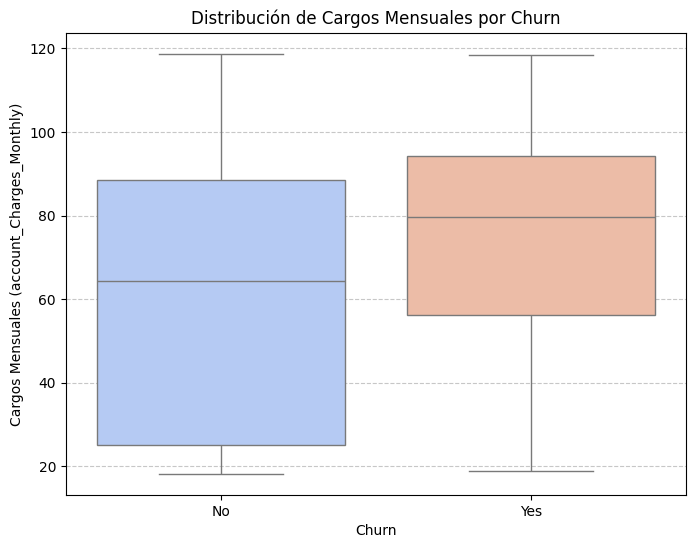

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df_final, palette='coolwarm', hue='Churn', legend=False)
plt.title('Distribuci√≥n de Cargos Mensuales por Churn')
plt.xlabel('Churn')
plt.ylabel('Cargos Mensuales (account_Charges_Monthly)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

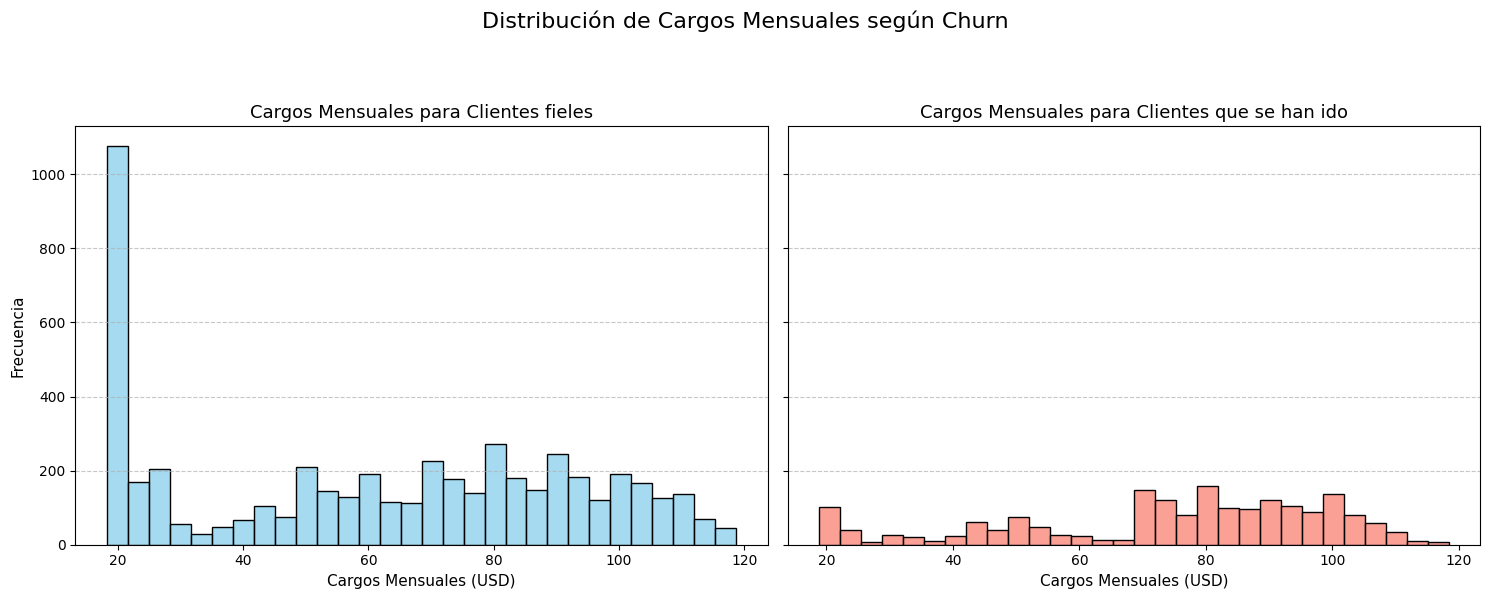

In [ ]:
# Gr√°fico de distribuciones mensuales seg√∫n Churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True) # sharey=True asegura que ambos tengan la misma escala en el eje Y

# Gr√°fico para Churn = 'No' (Clientes que NO se fueron)
sns.histplot(data=df_final[df_final['Churn'] == 'No'], # Filtra solo los clientes con Churn 'No'
             x='account_Charges_Monthly',
             bins=30, # Puedes ajustar los bins
             #kde=True,
             color='Skyblue', # Color para este histograma (invertido)
             ax=axes[0]) # Asigna el gr√°fico al primer subplot (√≠ndice 0)
axes[0].set_title('Cargos Mensuales para Clientes fieles', fontsize=13)
axes[0].set_xlabel('Cargos Mensuales (USD)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


# Gr√°fico para Churn = 'Yes' (Clientes que S√ç se fueron)
sns.histplot(data=df_final[df_final['Churn'] == 'Yes'], # Filtra solo los clientes con Churn 'Yes'
             x='account_Charges_Monthly',
             bins=30, # Mismos bins para consistencia en la comparaci√≥n
             #kde=True,
             color='salmon', # Color para este histograma (invertido)
             ax=axes[1]) # Asigna el gr√°fico al segundo subplot (√≠ndice 1)
axes[1].set_title('Cargos Mensuales para Clientes que se han ido', fontsize=13)
axes[1].set_xlabel('Cargos Mensuales (USD)', fontsize=11)
axes[1].set_ylabel('') # Deja el ylabel vac√≠o si sharey=True para evitar redundancia
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.suptitle('Distribuci√≥n de Cargos Mensuales seg√∫n Churn', fontsize=16, y=1.02) # T√≠tulo general para toda la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout para que no se solapen y deje espacio para el supert√≠tulo
plt.show()

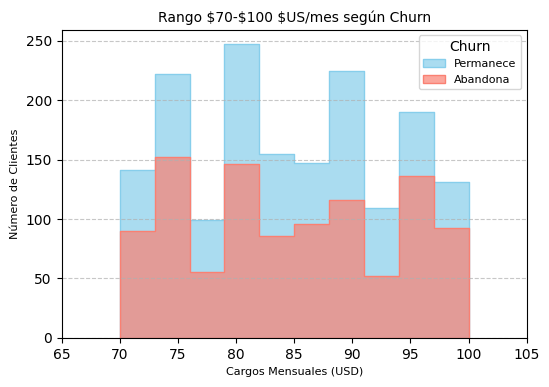

In [ ]:
# Filtrado del  DATAFRAME para el segmento de inter√©s: cargos mensuales entre 70 y 100 USD
df_segmento = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

plt.figure(figsize=(6, 4)) # Para el tama√±o de la figura

# Histograma con KDE superpuesto para los datos filtrados
sns.histplot(data=df_segmento, # DataFrame filtrado aqu√≠
             x='account_Charges_Monthly',
             hue='Churn',
             bins=10, # Ajuste de bins
             #kde=True, # Mantiene la curva de densidad suavizada
             stat="count", # MUESTRA EL CONTEO EN EL EJE Y
             palette={'No': 'skyblue', 'Yes': 'salmon'},
             alpha=0.7,
             element="step" # Opcional: dibuja el histograma como pasos
            )

# T√≠tulo y etiquetas a los ejes
plt.title('Rango $70-$100 $US/mes seg√∫n Churn', fontsize=10)
plt.xlabel('Cargos Mensuales (USD)', fontsize=8)
plt.ylabel('N√∫mero de Clientes', fontsize=8) # Etiqueta del eje Y ajustada

# Ajusta los l√≠mites del eje X para enfocar solo el rango de inter√©s
plt.xlim(65, 105)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Para a√±adir una cuadr√≠cula
plt.legend(title='Churn', labels=['Permanece', 'Abandona'], fontsize=8)
plt.show()

In [ ]:
# Filtra el df_final para crear df_rango que es con el que se continuar√° trabajando
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

print(f"Dimensiones del DataFrame original (df_final): {df_final.shape}")
print(f"Dimensiones del DataFrame filtrado (df_rango): {df_rango.shape}")


Dimensiones del DataFrame original (df_final): (7032, 22)
Dimensiones del DataFrame filtrado (df_rango): (2687, 22)



--- Porcentajes Globales de Churn en el Rango $70-$100 ---
Churn
No     62.002233
Yes    37.997767
Name: proportion, dtype: float64


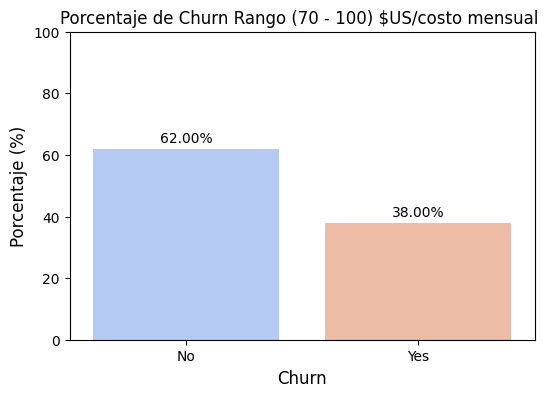

In [ ]:
# Calcular porcentajes globales de Churn en df_rango
churn_percentages_rango = df_rango['Churn'].value_counts(normalize=True) * 100

print("\n--- Porcentajes Globales de Churn en el Rango $70-$100 ---")
print(churn_percentages_rango)

#Visualizaci√≥n de estos porcentajes

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percentages_rango.index, y=churn_percentages_rango.values, palette='coolwarm', hue=churn_percentages_rango.index, legend=False)
plt.title('Porcentaje de Churn Rango (70 - 100) $US/costo mensual ', fontsize=12)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.ylim(0, 100) # Eje y entre  y 100
for index, value in enumerate(churn_percentages_rango.values):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center') # Etiquetas de porcentaje
plt.show()

# Aprox., el 38% de este rango da de baja el servicio

Osea el 38 % de los clientes de este rango, se dan de baja, lo que indica que aqui hay un problema

In [ ]:
# CLIENTES NO CHURN/PARA TODO EL DF

# Filtro del DataFrame para obtener solo los clientes que NO hicieron churn
df_no_churn = df_final[df_final['Churn'] == 'No'].copy()

print(f"Total de clientes con Churn = 'No': {len(df_no_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de tel√©fono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='No' con SOLO servicio de tel√©fono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'No') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de tel√©fono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con servicio de tel√©fono e internet: {count_phone_and_internet}")

# Verificaci√≥n opcional: la suma de las categor√≠as deber√≠a ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categor√≠as o no tiene ning√∫n servicio.
# Si hay clientes sin ning√∫n servicio, o con PhoneService='No' y InternetService='No', no ser√°n contados aqu√≠.
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de No Churn: {len(df_no_churn) - total_counted}")

Total de clientes con Churn = 'No': 5163

Clientes Churn='No' con SOLO servicio de tel√©fono: 1407
Clientes Churn='No' con SOLO servicio de internet: 510
Clientes Churn='No' con servicio de tel√©fono e internet: 3246

Suma de clientes contados: 5163
Diferencia con el total de No Churn: 0


In [ ]:
# CLIENTES NO CHURN - RANGO (70-100)$US
# Filtrar para obtener el rango:

# Filtrado del DataFrame para obtener solo los clientes que NO hicieron churn
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

df_no_churn = df_rango[df_rango['Churn'] == 'No'].copy()

print(f"Total de clientes con Churn = 'No': {len(df_no_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de tel√©fono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='No' con SOLO servicio de tel√©fono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'No') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de tel√©fono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_no_churn[
    (df_no_churn['phone_PhoneService'] == 'Yes') &
    (df_no_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='No' con servicio de tel√©fono e internet: {count_phone_and_internet}")

# Verificaci√≥n opcional: la suma de las categor√≠as deber√≠a ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categor√≠as o no tiene ning√∫n servicio.
# Si hay clientes sin ning√∫n servicio, o con PhoneService='No' y InternetService='No', no ser√°n contados aqu√≠
print ('Servicios contratados de los clientes fieles')
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de No Churn: {len(df_no_churn) - total_counted}")

Total de clientes con Churn = 'No': 1666

Clientes Churn='No' con SOLO servicio de tel√©fono: 0
Clientes Churn='No' con SOLO servicio de internet: 0
Clientes Churn='No' con servicio de tel√©fono e internet: 1666
Servicios contratados de los clientes fieles

Suma de clientes contados: 1666
Diferencia con el total de No Churn: 0


In [ ]:
# CLIENTES YES CHURN/PARA TODO EL DF

# Filtrado del DataFrame para obtener solo los clientes que SI hicieron churn
# osea se dieron de baja de los servicios contratados
df_yes_churn = df_final[df_final['Churn'] == 'Yes'].copy()

print(f"Total de clientes con Churn = 'Yes': {len(df_yes_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de tel√©fono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='Yes' con SOLO servicio de tel√©fono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_solo_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'No') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con SOLO servicio de internet: {count_solo_internet}")


# 3. Clientes con servicio de tel√©fono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_e_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con servicio de tel√©fono e internet: {count_phone_e_internet}")

# Verificaci√≥n opcional: la suma de las categor√≠as deber√≠a ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categor√≠as o no tiene ning√∫n servicio.
# Si hay clientes sin ning√∫n servicio, o con PhoneService='No' y InternetService='No', no ser√°n contados aqu√≠.
total_counted = count_only_phone + count_solo_internet + count_phone_e_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de Yes Churn: {len(df_yes_churn) - total_counted}")

Total de clientes con Churn = 'Yes': 1869

Clientes Churn='Yes' con SOLO servicio de tel√©fono: 113
Clientes Churn='Yes' con SOLO servicio de internet: 170
Clientes Churn='Yes' con servicio de tel√©fono e internet: 1586

Suma de clientes contados: 1869
Diferencia con el total de Yes Churn: 0


In [ ]:
# CLIENTES Yes CHURN - RANGO (70-100)$US
# Filtrar para obtener el rango:
# Filtrar el DataFrame para filtrar los clientes del rango (70-100)$US
df_rango = df_final[(df_final['account_Charges_Monthly'] >= 70) & (df_final['account_Charges_Monthly'] <= 100)].copy()

df_yes_churn = df_rango[df_rango['Churn'] == 'Yes'].copy()

print(f"Total de clientes con Churn = Yes: {len(df_yes_churn)}")

# --- Calcular los conteos ---

# Clientes con SOLO servicio de tel√©fono
# Tienen phone_PhoneService = 'Yes' e internet_InternetService = 'No'
count_only_phone = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'] == 'No')
].shape[0]
print(f"\nClientes Churn='Yes' con SOLO servicio de tel√©fono: {count_only_phone}")

# Clientes con SOLO servicio de internet
# Tienen phone_PhoneService = 'No' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_only_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'No') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con SOLO servicio de internet: {count_only_internet}")


# 3. Clientes con servicio de tel√©fono e internet
# Tienen phone_PhoneService = 'Yes' Y internet_InternetService es 'DSL' o 'Fiber optic'
count_phone_and_internet = df_yes_churn[
    (df_yes_churn['phone_PhoneService'] == 'Yes') &
    (df_yes_churn['internet_InternetService'].isin(['DSL', 'Fiber optic']))
].shape[0]
print(f"Clientes Churn='Yes' con servicio de tel√©fono e internet: {count_phone_and_internet}")

# Verificaci√≥n opcional: la suma de las categor√≠as deber√≠a ser igual al total de clientes sin Churn
# Ojo: esto asume que cada cliente cae en una de estas tres categor√≠as o no tiene ning√∫n servicio.
# Si hay clientes sin ning√∫n servicio, o con PhoneService='No' y InternetService='No', no ser√°n contados aqu√≠
print ('Servicios contratados de los clientes con Churn (Rango 70-100 $US)')
total_counted = count_only_phone + count_only_internet + count_phone_and_internet
print(f"\nSuma de clientes contados: {total_counted}")
print(f"Diferencia con el total de Yes Churn: {len(df_yes_churn) - total_counted}")

Total de clientes con Churn = Yes: 1021

Clientes Churn='Yes' con SOLO servicio de tel√©fono: 0
Clientes Churn='Yes' con SOLO servicio de internet: 0
Clientes Churn='Yes' con servicio de tel√©fono e internet: 1021
Servicios contratados de los clientes con Churn (Rango 70-100 $US)

Suma de clientes contados: 1021
Diferencia con el total de Yes Churn: 0


Total de clientes fieles en el segmento $70-$100: 1666
De ellos, clientes fieles con servicio telef√≥nico: 1666

--- Conteo de Servicio Multil√≠nea (Clientes Fieles con Tel√©fono) ---
phone_MultipleLines
Yes    981
No     685
Name: count, dtype: int64

--- Porcentaje de Servicio Multil√≠nea (Clientes Fieles con Tel√©fono) ---
phone_MultipleLines
Yes    58.883553
No     41.116447
Name: proportion, dtype: float64


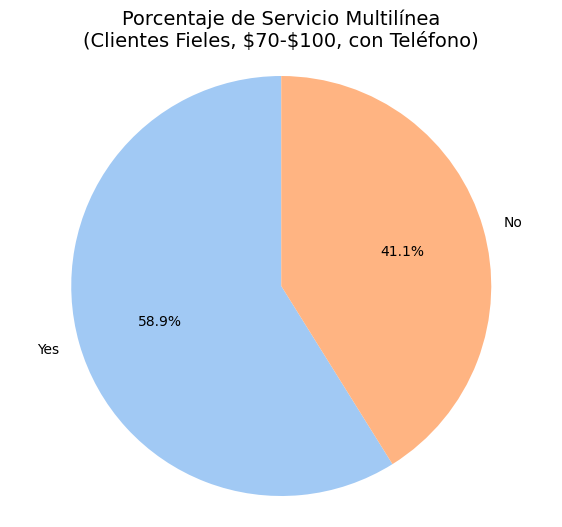

In [ ]:
# Clientes fieles
df_no_churn_segmento = df_final[
    (df_final['Churn'] == 'No') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes fieles en el segmento $70-$100: {len(df_no_churn_segmento)}")

# Paso 2: Filtrar a los clientes que tienen servicio telef√≥nico ('phone_PhoneService' == 'Yes')
clientes_con_telefono_fieles = df_no_churn_segmento[
    df_no_churn_segmento['phone_PhoneService'] == 'Yes'
].copy()

print(f"De ellos, clientes fieles con servicio telef√≥nico: {len(clientes_con_telefono_fieles)}")

# Paso 3: Calcular el conteo y porcentaje de 'phone_MultipleLines' para este grupo
if not clientes_con_telefono_fieles.empty:
    # Conteo de clientes con y sin servicio multil√≠nea
    conteo_multilinea = clientes_con_telefono_fieles['phone_MultipleLines'].value_counts()

    # Porcentaje de clientes con y sin servicio multil√≠nea
    porcentaje_multilinea = clientes_con_telefono_fieles['phone_MultipleLines'].value_counts(normalize=True) * 100

    print("\n--- Conteo de Servicio Multil√≠nea (Clientes Fieles con Tel√©fono) ---")
    print(conteo_multilinea)

    print("\n--- Porcentaje de Servicio Multil√≠nea (Clientes Fieles con Tel√©fono) ---")
    print(porcentaje_multilinea)

    # Opcional: Visualizaci√≥n con un gr√°fico de torta o de barras

    plt.figure(figsize=(7, 6))
    plt.pie(porcentaje_multilinea, labels=porcentaje_multilinea.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Porcentaje de Servicio Multil√≠nea\n(Clientes Fieles, \$70-\$100, con Tel√©fono)', fontsize=14)
    plt.axis('equal') # Asegura que el gr√°fico de torta sea circular
    plt.show()

else:
    print("\nNo hay clientes fieles con servicio telef√≥nico en el rango de $70-$100 para analizar.")


Total de clientes salientes en el segmento $70-$100: 1666
De ellos, clientes salientes del servicio telef√≥nico: 1666

--- Conteo de Servicio Multil√≠nea (Clientes salientes con Tel√©fono) ---
phone_MultipleLines
Yes    564
No     457
Name: count, dtype: int64

--- Porcentaje de Servicio Multil√≠nea (Clientes salientes con Tel√©fono) ---
phone_MultipleLines
Yes    55.239961
No     44.760039
Name: proportion, dtype: float64


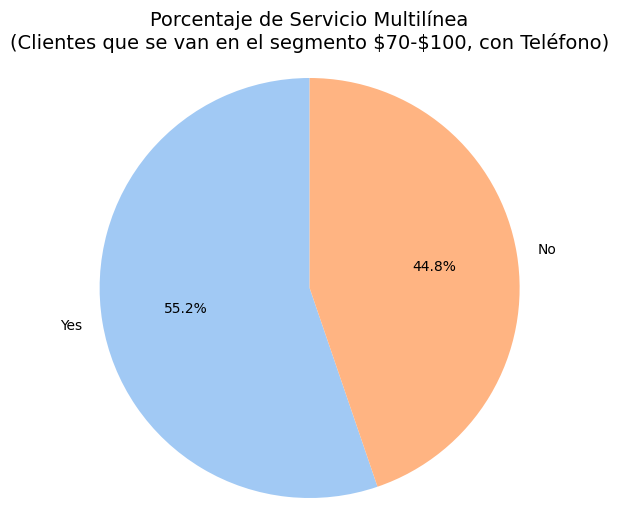

In [ ]:
# An√°lisis Multilinea telefonica para los clientes que se van en el segmento 70-100
df_yes_churn_segmento = df_final[
    (df_final['Churn'] == 'Yes') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes salientes en el segmento $70-$100: {len(df_no_churn_segmento)}")

# Paso 2: Filtrar a los clientes que tienen servicio telef√≥nico ('phone_PhoneService' == 'Yes')
yes_church = df_yes_churn_segmento[
    df_yes_churn_segmento['phone_PhoneService'] == 'Yes'
].copy()

print(f"De ellos, clientes salientes del servicio telef√≥nico: {len(clientes_con_telefono_fieles)}")

# Paso 3: Calcular el conteo y porcentaje de 'phone_MultipleLines' para este grupo
if not yes_church.empty:
    # Conteo de clientes con y sin servicio multil√≠nea
    conteo_multilinea1 = yes_church['phone_MultipleLines'].value_counts()

    # Porcentaje de clientes con y sin servicio multil√≠nea
    porcentaje_multilinea2 = yes_church['phone_MultipleLines'].value_counts(normalize=True) * 100

    print("\n--- Conteo de Servicio Multil√≠nea (Clientes salientes con Tel√©fono) ---")
    print(conteo_multilinea1)

    print("\n--- Porcentaje de Servicio Multil√≠nea (Clientes salientes con Tel√©fono) ---")
    print(porcentaje_multilinea2)

    # Opcional: Visualizaci√≥n con un gr√°fico de torta o de barras
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(7, 6))
    plt.pie(porcentaje_multilinea2, labels=porcentaje_multilinea.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Porcentaje de Servicio Multil√≠nea\n(Clientes que se van en el segmento \$70-\$100, con Tel√©fono)', fontsize=14)
    plt.axis('equal') # Asegura que el gr√°fico de torta sea circular
    plt.show()

else:
    print("\nNo hay clientes fieles con servicio telef√≥nico en el rango de $70-$100 para analizar.")


Se concluye que en cuanto al servicio de multilineas de tel√©fonos no hay diferencias significativas, en cuanto al grupo de clientes fieles y los que abandonan el servicio, en el segmento de costo de 70 a 100 US


--- Conteo de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---
internet_InternetService
Fiber optic    1109
DSL             559
Name: count, dtype: int64

--- Porcentaje de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---
internet_InternetService
Fiber optic    66.486811
DSL            33.513189
Name: count, dtype: float64


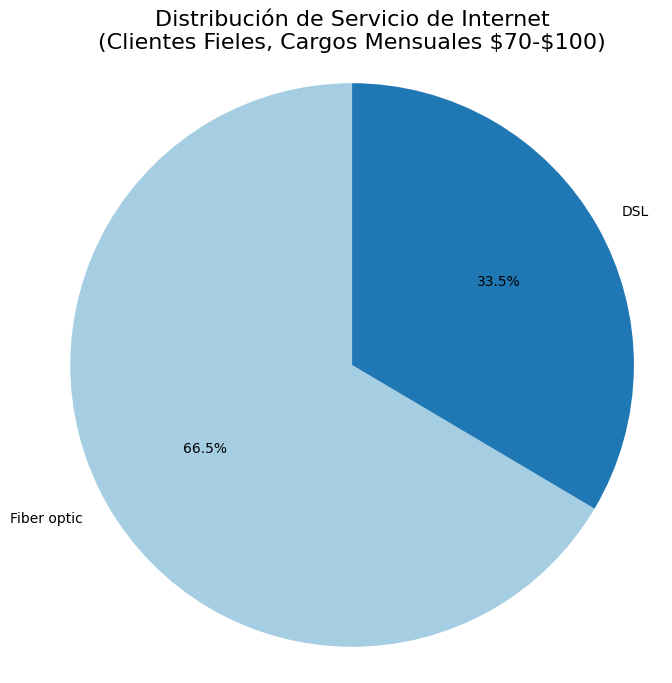

In [ ]:
# ANALISIS DEL SERVICIO DE INTERNET
# Este comprende los servicios:
# 'internet_InternetService': a su vez con las categor√≠as: 'Fiber optic' y 'DSL'
# Este DataFrame contiene clientes con Churn='No' Y MonthlyCharges entre 70 y 100 USD.
df_no_churn_segmento = df_final[
    (df_final['Churn'] == 'No') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# 1. Calcular las proporciones de las categor√≠as de internet_InternetService
# Solo nos interesan 'Fiber optic' y 'DSL' en este contexto, as√≠ que filtraremos.
internet_service_counts = df_no_churn_segmento['internet_InternetService'].value_counts()

# Asegurarse de que solo consideramos 'Fiber optic' y 'DSL'
# Si hay otras categor√≠as como 'No', deber√≠amos excluirlas si el objetivo es solo 'Fiber optic' y 'DSL'.
internet_service_proportions = internet_service_counts[
    internet_service_counts.index.isin(['Fiber optic', 'DSL'])
]

# Calcular los porcentajes
internet_service_percentages = internet_service_proportions / internet_service_proportions.sum() * 100

print("\n--- Conteo de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---")
print(internet_service_proportions)
print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes Fieles, $70-$100) ---")
print(internet_service_percentages)

# 2. Generar el gr√°fico de torta
if not internet_service_percentages.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(internet_service_percentages,
            labels=internet_service_percentages.index,
            autopct='%1.1f%%', # Formato para mostrar los porcentajes en las porciones
            startangle=90,     # Inicia la primera porci√≥n en la parte superior
            colors=sns.color_palette('Paired')) # Una paleta de colores amigable

    plt.title('Distribuci√≥n de Servicio de Internet\n(Clientes Fieles, Cargos Mensuales \$70-\$100)', fontsize=16)
    plt.axis('equal') # Asegura que el gr√°fico de torta sea circular
    plt.show()
else:
    print("\nNo hay datos para 'Fiber optic' o 'DSL' en el segmento de clientes fieles y el rango de $70-$100.")


--- Porcentaje de Tipos de Servicio de Internet (Clientes No Churn, $70-$100) ---
internet_InternetService
Fiber optic    66.486811
DSL            33.513189
Name: count, dtype: float64

--- Porcentaje de Tipos de Servicio de Internet (Clientes Con Churn, $70-$100) ---
internet_InternetService
Fiber optic    95.984329
DSL             4.015671
Name: count, dtype: float64


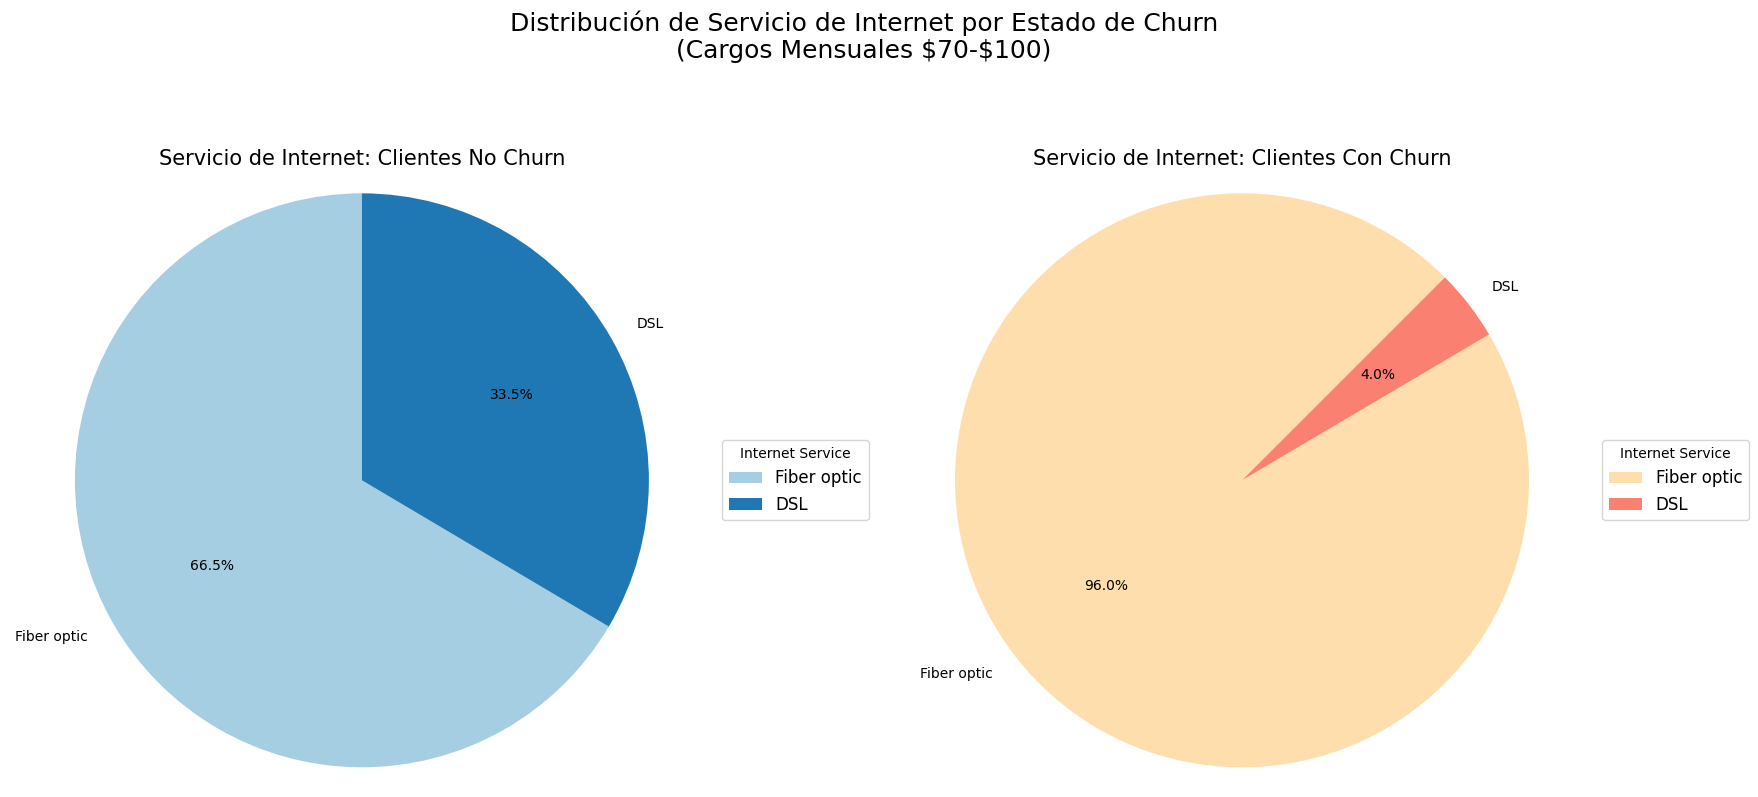

In [ ]:
# Filtrado del DataFrame para el rango de inter√©s ($70-$100)
df_segmento = df_final[
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# Filtrar para Churn = 'No'
df_no_churn_segmento = df_segmento[df_segmento['Churn'] == 'No'].copy()

# Filtrar para Churn = 'Yes'
df_yes_churn_segmento = df_segmento[df_segmento['Churn'] == 'Yes'].copy()


# --- Calcular las proporciones para Churn = 'No' ---
internet_counts_no = df_no_churn_segmento['internet_InternetService'].value_counts()
# Solo nos interesan 'Fiber optic' y 'DSL', y manejar el caso donde 'No' servicio de internet tambi√©n exista
internet_proportions_no = internet_counts_no[internet_counts_no.index.isin(['Fiber optic', 'DSL'])]

# Calcular porcentajes, asegurando que la suma sea solo para DSL y Fiber Optic
if not internet_proportions_no.empty and internet_proportions_no.sum() > 0:
    internet_percentages_no = (internet_proportions_no / internet_proportions_no.sum()) * 100
else:
    internet_percentages_no = pd.Series(dtype=float) # Manejar el caso de no datos


# --- Calcular las proporciones para Churn = 'Yes' ---
internet_counts_yes = df_yes_churn_segmento['internet_InternetService'].value_counts()
# Solo nos interesan 'Fiber optic' y 'DSL'
internet_proportions_yes = internet_counts_yes[internet_counts_yes.index.isin(['Fiber optic', 'DSL'])]

# Calcular porcentajes, asegurando que la suma sea solo para DSL y Fiber Optic
if not internet_proportions_yes.empty and internet_proportions_yes.sum() > 0:
    internet_percentages_yes = (internet_proportions_yes / internet_proportions_yes.sum()) * 100
else:
    internet_percentages_yes = pd.Series(dtype=float) # Manejar el caso de no datos


print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes No Churn, $70-$100) ---")
print(internet_percentages_no)
print("\n--- Porcentaje de Tipos de Servicio de Internet (Clientes Con Churn, $70-$100) ---")
print(internet_percentages_yes)


# --- Generar los gr√°ficos de torta en una sola visualizaci√≥n ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 fila, 2 columnas para los dos gr√°ficos

# Gr√°fico de torta para Churn = 'No'
if not internet_percentages_no.empty:
    wedges0, texts0, autotexts0 = axes[0].pie(internet_percentages_no,
                labels=internet_percentages_no.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=sns.color_palette('Paired')) # Una paleta de colores amigable

    axes[0].set_title('Servicio de Internet: Clientes No Churn', fontsize=15)
    axes[0].axis('equal') # Asegura que el gr√°fico sea circular

    # Aumentar tama√±o de fuente de la leyenda
    axes[0].legend(wedges0, internet_percentages_no.index,
                   title="Internet Service",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1),
                   fontsize=12) # Ajusta el tama√±o de la fuente aqu√≠

else:
    axes[0].text(0.5, 0.5, 'No hay datos para mostrar', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Servicio de Internet: Clientes No Churn', fontsize=15)
    axes[0].axis('off')


# Gr√°fico de torta para Churn = 'Yes'
if not internet_percentages_yes.empty:
    wedges1, texts1, autotexts1 = axes[1].pie(internet_percentages_yes,
                labels=internet_percentages_yes.index,
                autopct='%1.1f%%',
                startangle=45,
                colors=['NavajoWhite', 'salmon']) # Colores personalizados

    axes[1].set_title('Servicio de Internet: Clientes Con Churn', fontsize=15)
    axes[1].axis('equal') # Asegura que el gr√°fico sea circular

    # Aumentar tama√±o de fuente de la leyenda
    axes[1].legend(wedges1, internet_percentages_yes.index,
                   title="Internet Service",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1),
                   fontsize=12) # Ajusta el tama√±o de la fuente aqu√≠


else:
    axes[1].text(0.5, 0.5, 'No hay datos para mostrar', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Servicio de Internet: Clientes Con Churn', fontsize=15)
    axes[1].axis('off')


plt.suptitle('Distribuci√≥n de Servicio de Internet por Estado de Churn\n(Cargos Mensuales \$70-\$100)', fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

En este punto claramente hay un problema, que explica que la baja del 96% de los servicios contratados de Internet, en este tramo (10-100 US de los planes) y pudieran estar relacionados con la calidad del servicio de Fibra Optica, en los tramos m√°s costosos de los esquemas de cargos, donde los clientes suelen pagar precios m√°s elevados por una mejor calidad del servicio

In [ ]:
# --- 1. Cantidad total de clientes Churn='Yes' en el df_final ---
total_churn_yes_df_final = df_final[df_final['Churn'] == 'Yes'].shape[0]
print(f"1. Cantidad total de clientes con Churn='Yes' en el DataFrame completo (df_final): {total_churn_yes_df_final}")

# --- 2. Cantidad total de clientes Churn='Yes' en el tramo de costo mensual $70-$100 ---
# Primero, filtramos el DataFrame para este rango de costos mensuales.
df_70_100 = df_final[
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

# Luego, contamos los que tienen Churn='Yes' en este segmento.
total_churn_yes_70_100 = df_70_100[df_70_100['Churn'] == 'Yes'].shape[0]
print(f"2. Cantidad total de clientes con Churn='Yes' en el tramo $70-$100: {total_churn_yes_70_100}")

# --- 3. Cantidad total de clientes Churn='Yes' con 'Fiber Optic' en el tramo $70-$100 ---
# Partimos del DataFrame ya filtrado por el tramo de costo mensual (df_70_100).
# Luego, a√±adimos el filtro para 'internet_InternetService' == 'Fiber optic' y 'Churn' == 'Yes'.
total_churn_yes_fiber_70_100 = df_70_100[
    (df_70_100['Churn'] == 'Yes') &
    (df_70_100['internet_InternetService'] == 'Fiber optic')
].shape[0]
print(f"3. Cantidad total de clientes con Churn='Yes' y 'Fiber Optic' en el tramo $70-$100: {total_churn_yes_fiber_70_100}")
print(f"3. Proporci√≥n de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100, \n con respecto al total de churn: {total_churn_yes_fiber_70_100/total_churn_yes_df_final*100:.2f}")
print(f"4. Proporci√≥n de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100,\n con respecto al total de churn en el tramo $70-$100: {total_churn_yes_fiber_70_100/total_churn_yes_70_100*100:.2f}")

1. Cantidad total de clientes con Churn='Yes' en el DataFrame completo (df_final): 1869
2. Cantidad total de clientes con Churn='Yes' en el tramo $70-$100: 1021
3. Cantidad total de clientes con Churn='Yes' y 'Fiber Optic' en el tramo $70-$100: 980
3. Proporci√≥n de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100, 
 con respecto al total de churn: 52.43
4. Proporci√≥n de clientes con Churn= 'Yes' y 'Fiber Optic' en el tramo $70-$100,
 con respecto al total de churn en el tramo $70-$100: 95.98


Se concluye que del total de clientes p√©rdidos por Telecom, la mitad (52,43%) corresponde a aquellos de las siguientes caracteristicas:
- Se encuentran en el tramo de costo del plan de entre '($70-$100)' US$/mes.
- El 96% de clientes de este tramo contrataban especificamente el plan de Internet de Fibra √≥ptica.

Con este hallazgo se explica el 52,43 % de p√©rdidas de clientes.

Total de clientes Churn='Yes' en el tramo $70-$100: 1021

--- Conteo de Servicios de Internet Adicionales para Clientes con Churn ('Yes') en el Rango $70-$100 ---

internet_OnlineSecurity:
{'No': 895, 'Yes': 126}

internet_OnlineBackup:
{'No': 759, 'Yes': 262}

internet_DeviceProtection:
{'No': 761, 'Yes': 260}

internet_TechSupport:
{'No': 893, 'Yes': 128}

internet_StreamingTV:
{'No': 551, 'Yes': 470}

internet_StreamingMovies:
{'No': 553, 'Yes': 468}

--- Resumen Consolidado de Conteos ---
                                 No  Yes
Servicio de Internet Adicional          
internet_OnlineSecurity         895  126
internet_OnlineBackup           759  262
internet_DeviceProtection       761  260
internet_TechSupport            893  128
internet_StreamingTV            551  470
internet_StreamingMovies        553  468


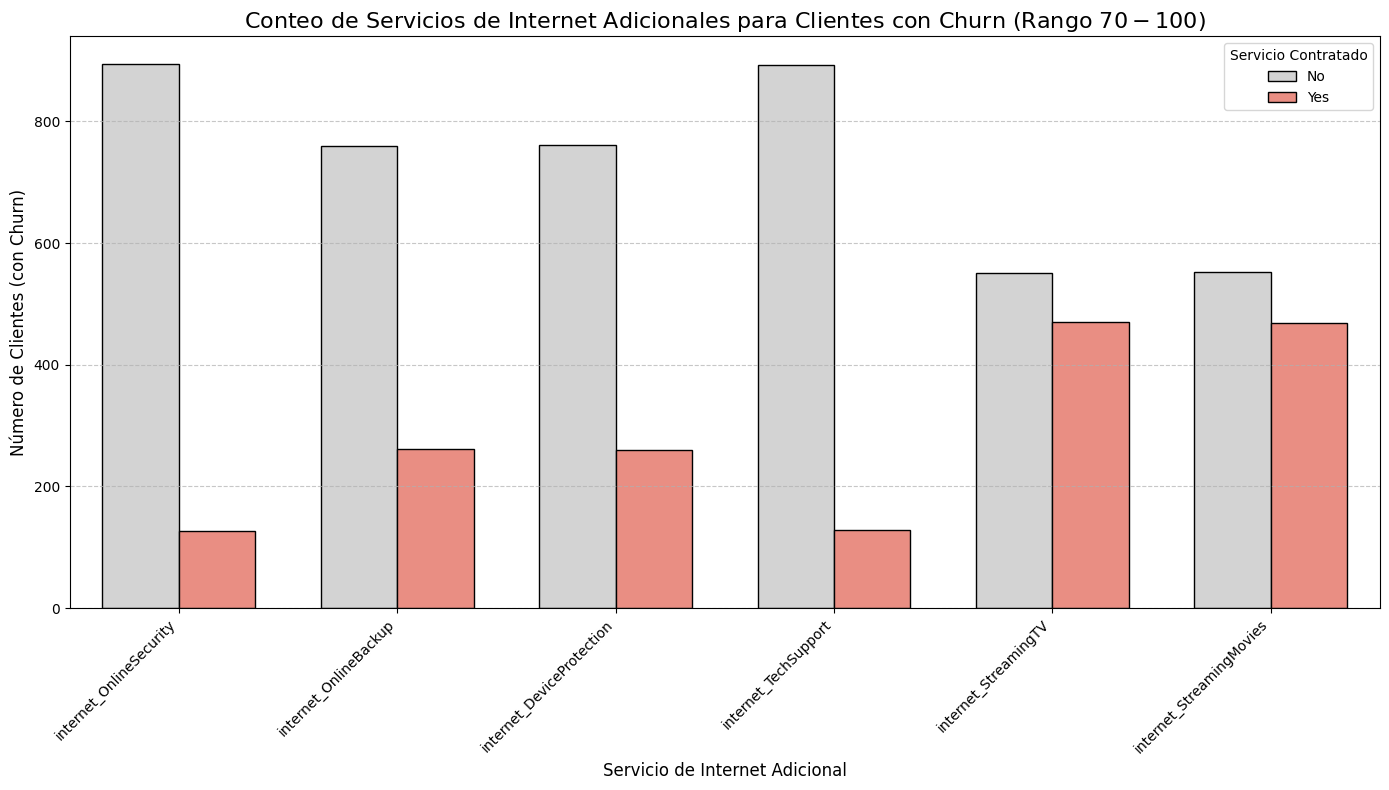

In [ ]:
# Caracterizaci√≥n clientes tramo 70-100, fibra √≥ptica, seg√∫n opciones

# Cargos mensuales entre $70 y $100
df_churn_segmento_70_100 = df_final[
    (df_final['Churn'] == 'Yes') &
    (df_final['account_Charges_Monthly'] >= 70) &
    (df_final['account_Charges_Monthly'] <= 100)
].copy()

print(f"Total de clientes Churn='Yes' en el tramo $70-$100: {len(df_churn_segmento_70_100)}")

# Columnas de servicios de internet adicionales a analizar
internet_service_cols = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# --- Contar los valores 'Yes' y 'No' para cada columna ---
print("\n--- Conteo de Servicios de Internet Adicionales para Clientes con Churn ('Yes') en el Rango $70-$100 ---")

# Diccionario para almacenar los conteos
service_counts = {}

for col in internet_service_cols:
    counts = df_churn_segmento_70_100[col].value_counts().to_dict()
    service_counts[col] = counts
    print(f"\n{col}:")
    print(counts)

# Convertir el diccionario de conteos a un DataFrame para facilitar la visualizaci√≥n
# Esto crear√° un DataFrame con las columnas de servicio como √≠ndice y 'Yes'/'No' como columnas
df_service_counts = pd.DataFrame.from_dict(service_counts, orient='index').fillna(0).astype(int)
df_service_counts.index.name = 'Servicio de Internet Adicional'

print("\n--- Resumen Consolidado de Conteos ---")
print(df_service_counts)

# --- Histograma (gr√°fico de barras para los conteos 'Yes'/'No') ---
# Para un histograma que muestre el conteo de 'Yes' y 'No' por cada servicio,
# lo m√°s adecuado es un gr√°fico de barras agrupado o apilado.

# Preparar los datos para la visualizaci√≥n: derretir el DataFrame para usar hue
df_plot = df_service_counts.reset_index().melt(
    id_vars='Servicio de Internet Adicional',
    var_name='Estado del Servicio',
    value_name='Conteo de Clientes'
)

plt.figure(figsize=(14, 8)) # Ajusta el tama√±o para una mejor visualizaci√≥n

sns.barplot(
    data=df_plot,
    x='Servicio de Internet Adicional',
    y='Conteo de Clientes',
    hue='Estado del Servicio', # Diferencia 'Yes' y 'No' por color
    palette={'Yes': 'salmon', 'No':  '#d3d3d3'},
 # Colores personalizados
    edgecolor='black', # Borde para cada barra
    width=0.7 # Ancho de las barras
)

plt.title('Conteo de Servicios de Internet Adicionales para Clientes con Churn (Rango $70-$100)', fontsize=16)
plt.xlabel('Servicio de Internet Adicional', fontsize=12)
plt.ylabel('N√∫mero de Clientes (con Churn)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Servicio Contratado')
plt.tight_layout()
plt.show()

In [ ]:
# Data Frame, de todos los clientes con Churn
df_churn_yes = df_final[df_final['Churn'] == 'Yes']
print(f"\nN√∫mero total de registros con Churn = 'Yes': {len(df_churn_yes)}")
df_churn_yes.head(2)



N√∫mero total de registros con Churn = 'Yes': 1869


customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   

  internet_InternetService  ... internet_DeviceProtection  \
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
2                   No                   No                       No   
3                   No                  Yes                      Yes   

  account_Contract account_PaperlessBilling account_PaymentMethod  \
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   

  account_Charges_Monthly account_Charges_Total  Cuentas_Diarias  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  

[2 rows x 22 columns]

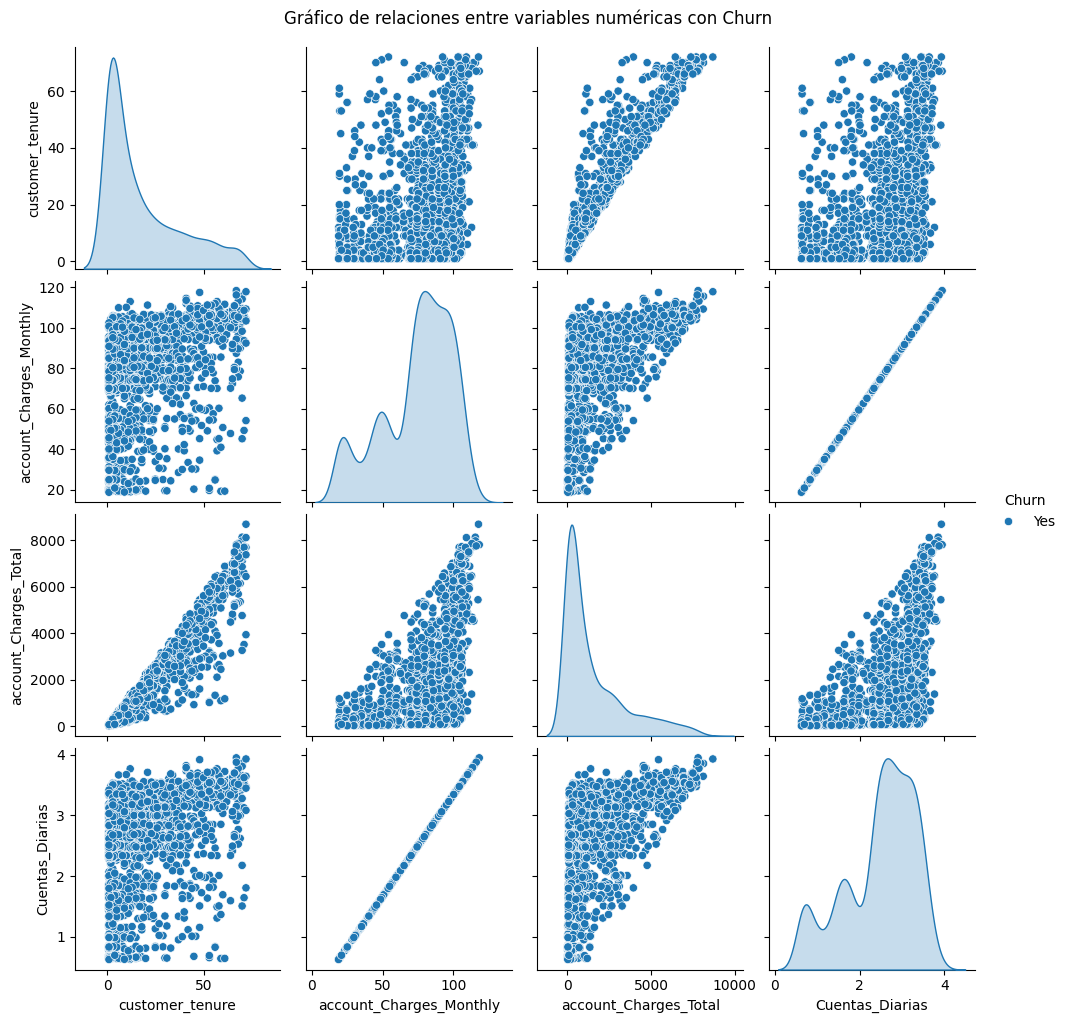

In [ ]:
# Ploteo variables num√©ricas:
# Variables num√©ricas para pairplot
variables_para_plot = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias' ]
sns.pairplot(df_churn_yes, vars=variables_para_plot, hue='Churn')
plt.suptitle('Gr√°fico de relaciones entre variables num√©ricas con Churn', y=1.02)
plt.show()

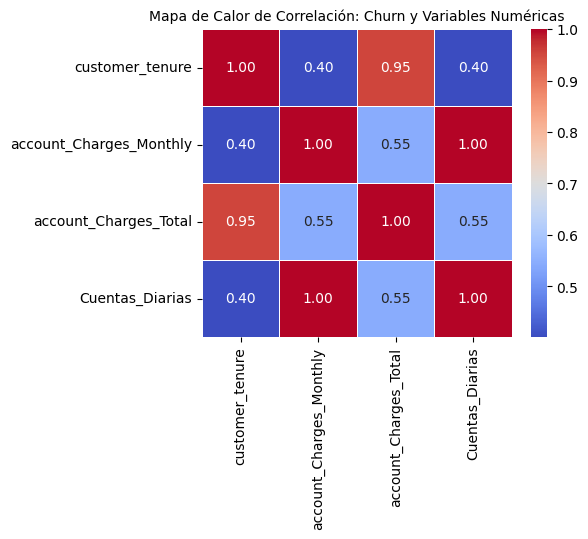

In [ ]:
# Columnas num√©ricas para el c√°lculo de correlaci√≥n
columnas_numericas = [
    'customer_tenure',
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias'
]

# Calcular la matriz de correlaci√≥n solo con las columnas num√©ricas
correlacion = df_churn_yes[columnas_numericas].corr()

# Visualizar el mapa de calor
plt.figure(figsize=(5, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlaci√≥n: Churn y Variables Num√©ricas', fontsize=10)
plt.show()

Se aprecian correlaciones fuertes entre algunas variables, sin embargo hay que descartar una posible multicolinealidad, en el caso de implementar futuros modelos de predicci√≥n.

#üìÑInforme final

**Conclusiones del An√°lisis Descriptivo**

A trav√©s de un an√°lisis descriptivo detallado, ha sido posible lograr la identificaci√≥n de patrones significativos en el comportamiento de los clientes y su relaci√≥n con el Churn.

Los hallazgos m√°s relevantes son los siguientes:

 - Identificaci√≥n de un segmento de riesgo clave: Un hallazgo destacado es que aproximadamente el 52,43% de los clientes que abandonan la empresa (Churn) se concentra en un rango de facturaci√≥n mensual entre $70 - $100 USD. Este comportamiento se observa de manera espec√≠fica en los clientes que han contratado el servicio de fibra √≥ptica. Este segmento representa una clara √°rea de enfoque para futuras acciones de retenci√≥n.

 - Insuficiencia del an√°lisis descriptivo: Aunque se han identificado estas relaciones, el an√°lisis descriptivo presenta limitaciones para explorar la complejidad completa del problema. Con un total de 21 variables explicativas, la interacci√≥n de m√∫ltiples factores que influyen en el Churn de los clientes restantes es demasiado compleja para ser abordada √∫nicamente con herramientas de visualizaci√≥n y an√°lisis de una o dos variables.

 - Necesidad de un enfoque m√°s avanzado: La incapacidad de este an√°lisis para explicar el comportamiento del 50% restante de los clientes que abandonan la empresa, subraya la necesidad de un enfoque m√°s robusto. Para desentra√±ar las relaciones multifactoriales y descubrir patrones ocultos, es fundamental avanzar hacia herramientas de Machine Learning.

En resumen, el an√°lisis descriptivo ha proporcionado una comprensi√≥n b√°sica y ha validado un segmento de clientes en riesgo, pero es insuficiente para una comprensi√≥n completa del problema. Por lo tanto, se concluye el an√°lisis descriptivo y se propone continuar la investigaci√≥n con modelos de Machine Learning, que permitir√°n identificar las variables explicativas m√°s importantes y construir un modelo predictivo robusto para la retenci√≥n de clientes.

In [ ]:
import sys
import platform

print("Versi√≥n de Python:", sys.version)
print("Versi√≥n de la plataforma:", platform.python_version())

Versi√≥n de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Versi√≥n de la plataforma: 3.11.13
